# RC OLED TADF - HF - DFT - TDDFT-TDA CALCULATIONS

September 2023

tion d'énergie, tels que les téléphones portables, ce qui pourrait à son tour conduire à des développements futurs où prat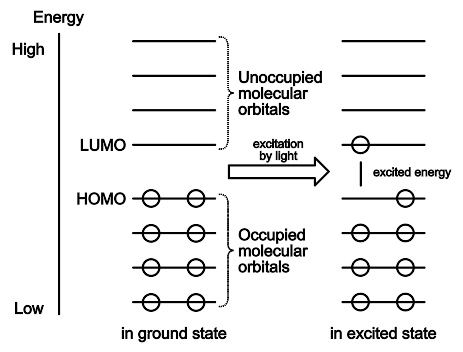## Introduction

Les diodes électroluminescentes organiques ou OLED sont devenues de plus en plus populaires ces dernières années en tant que base pour la fabrication d'écrans de télévision minces et flexibles et de téléphones portables qui émettent de la lumière lors de l'application d'un courant électrique. C'est pourquoi de nombreuses études s'intéressent aux transitions électroniques des états à haute énergie dans les molécules organiques qui pourraient être des émetteurs utiles de **fluorescence retardée activée thermiquement (TADF)** pour la technologie OLED. Les émetteurs TADF pourraient potentiellement produire des OLED qui fonctionnent avec une efficacité quantique interne (IQE) de 100%, c'est-à-dire la fraction des porteurs de charge dans un circuit ou un système qui émettent des photons absorbés, par rapport aux fluorophores conventionnels actuellement utilisés pour fabriquer des OLED dont les efficacités quantiques sont limitées à 25%. Cette forte augmentation de l'efficacité signifie que les fabricants pourraient produire des OLED à utiliser dans des appareils nécessitant une faible consommation d'énergie, tels que les téléphones portables, ce qui pourrait à son tour conduire à des développements futurs où pratiquement n'importe quelle surface peut être convertie en une source d'éclairage bon marché et économe en énergie couvrant de vastes zones de maisons, de bureaux et plus encore!

 <center> <img src = "resources/JSR_img6_1920w.jpg" width = "600">
 <img src = "resources/OLEDMultiScale.jpg" width = "600"> </center> 

Le présent tutoriel décrit comment utiliser les calcules TDDFT-TDA pour prédire de manière fiable les énergies des états excités de ces matériaux TADF. Pour des raisons pédagogiques, nous allons effectuer
   1. des  calcul SCF et DFT pour determiner l'energie total de l'état fondamental, le gap d'énergie entre l'orbite moléculaire la plus occupée (HOMO) et de l'orbite moléculaire la plus basse inoccupée (LUMO);
   2. un calcul TDDFT-TDA pour determiner l'énergie de fluorescence, la force d'oscillateur et le gap d'énergie singulet-triplet.

<center><img src="resources/Molecule_HOMO-LUMO_diagram.png" width="400">
<img src="resources/spin.jpg" width="320"></center>

Chaque cercle représente ici un électron dans une orbitale ; lorsque la lumière ou l'énergie d'une fréquence suffisamment élevée est absorbée par un électron dans le HOMO, il saute vers le LUMO.

Les molécules faiblement donneuses les plus utilisées sont le carbozole (Cz) et le dimethylacridan (DMAC). Mais ici, nous allons étudier la molécule [1,4-Azaborine](https://doi.org/10.1021/acsami.3c05409) (AZB) (PubChem CID 57252725) qui peut être associée à une large gamme de groupes d'accepteurs.

## Setting the working directory

In [45]:
import os

In [46]:
# Setting the working directory
smi_key = 'AZB'
working_dir = f'./RC/data/{smi_key}' # Ce choix est fait en imaginant que nous pouvons manipuler plusieurs molecules
# Create the output directory if it doesn't exist
os.makedirs(working_dir, exist_ok=True)

# Setting the results path
path_results = os.path.join(working_dir, f'{smi_key}_Results.csv')


## RDKit molecule object

### Visualisation de AZB en 2D

In [47]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [48]:
smile = 'B1=CC=NC=C1'
# Defines a molecule from its SMILES string
mol_rdkit = Chem.MolFromSmiles(smile)

img = Chem.Draw.MolToImage(mol_rdkit,
                     size=(150, 150),
                     legend = 'AZB',
                     imageType='png')
img.save(working_dir + '/AZB.png')

### Optimized conformation generation

In [49]:
# Add explicit Hs
mol_rdkit = Chem.AddHs(mol_rdkit)

# Generates the initial 3D conformation of the molecule
AllChem.EmbedMolecule(mol_rdkit)

# Optimizes the 3D conformation of the molecule using MMFF - Merck Molecular Force Field
AllChem.MMFFOptimizeMolecule(mol_rdkit, maxIters=200, mmffVariant="MMFF94s")

#Canonicalize the orientation of the conformation
Chem.rdMolTransforms.CanonicalizeMol(mol_rdkit, normalizeCovar=True, ignoreHs=False)

[13:51:44] UFFTYPER: Unrecognized atom type: B_1 (0)


### Propriétés de la molécule AZB

In [50]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
mol=mol_rdkit
# Liste des propriétés à extraire
properties = ['Poids_Moléculaire', 'Poids_Moléculaire_moyen', 'Solubilite', 'Polarite', 'Nombre_electrons_valence', 'Nombre_liaisons_donneurs_hydrogenes', 'Nombre_liaisons_accepteurs_hydrogenes']

# Création d'un DataFrame vide
data = []


        # Calcul des descripteurs
molwt = Descriptors.MolWt(mol)
molwt_avg = Descriptors.HeavyAtomMolWt(mol)
solubility = Descriptors.MolLogP(mol)
polarity = Descriptors.TPSA(mol)
num_valence_electrons = Descriptors.NumValenceElectrons(mol)
num_h_donors = Descriptors.NumHDonors(mol)
num_h_acceptors = Descriptors.NumHAcceptors(mol)
# Ajout des propriétés à la liste de données
data.append([ molwt,molwt_avg, solubility, polarity, num_valence_electrons, num_h_donors, num_h_acceptors])


# Création du DataFrame à partir des données
df = pd.DataFrame(data, columns=properties)


# Save the properties results dataframe to a file
with open(path_results, "a") as f:
    f.write(f"\n\nProperties of {smi_key} evaluated with RDKit\n")
    df.to_csv(f)

In [51]:
df

,Poids_Moléculaire,Poids_Moléculaire_moyen,Solubilite,Polarite,Nombre_electrons_valence,Nombre_liaisons_donneurs_hydrogenes,Nombre_liaisons_accepteurs_hydrogenes
0,76.895,72.863,0.4197,12.89,28,0,1


In [1]:
pip install CalcMolDescriptor


ERROR: Could not find a version that satisfies the requirement CalcMolDescriptor (from versions: none)
ERROR: No matching distribution found for CalcMolDescriptor
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from rdkit.Chem import Descriptors

# Calculating All Descriptors
prop =  Descriptors.CalcMolDescriptors(mol_rdkit)

property =['Poids Moléculaire', 'Poids moléculaire moyen', 'Solubilié', 'Polarité', 'Nombre électrons valence', 'Nombre de liaisons donneurs hydrogènes', 'Nombre de liaisons accepteurs hydrogènes']
descriptor = [prop['ExactMolWt'], prop['HeavyAtomMolWt'], prop['MolLogP'], prop['TPSA'], prop['NumValenceElectrons'], prop['NumHDonors'], prop['NumHAcceptors']]

df_des = pd.DataFrame(dict(Propriété=property, Descripteur=descriptor))

# Save the properties results dataframe to a file
with open(path_results, "a") as f:
    f.write(f"\n\nThe {smi_key} properties evaluated with RDKIT\n")
    df_des.to_csv(f)


AttributeError: module 'rdkit.Chem.Descriptors' has no attribute 'CalcMolDescriptors'

## PySCF molecule object

In [52]:
from pyscf import gto
import os

Créons le fichier des coordonnées de la molécule au format xyz.

In [53]:
# Convert RDKit molecule to XYZ format
mol_xyz = Chem.MolToXYZBlock(mol_rdkit)

# Remove the first line (number of atoms) from XYZ data
mol_xyz = '\n'.join(mol_xyz.strip().split('\n')[1:])

path_HF_txt = os.path.join(working_dir, f'{smi_key}_HF.txt')

# Convert conformers to Pyscf Mol objects
mol_pyscf = gto.Mole(
    atom=mol_xyz,
    charge=0,
    spin = 0,  # 2j == nelec_alpha - nelec_beta
    basis = '631g*',
    symmetry = True, # Allow the program to apply point group symmetry if possible
    unit = 'Angstrom',
    output = path_HF_txt
    )

### Nombre d'orbitales Atomique (AO)

In [54]:
mol_pyscf.build()
print('Number of AO:', mol_pyscf.nao_nr())
print('Shape of AO 1-Body terms:', mol_pyscf.intor('int1e_kin').shape)

overwrite output file: ./RC/data/AZB/AZB_HF.txt
Number of AO: 92
Shape of AO 1-Body terms: (92, 92)


La matrice `(AO) 1-Body Terms` (92 x 92) décrit la molécule AZB avec 92 orbitales atomiques qui se traduisent par 92 orbitales moléculaires. 

## SCF mean field calculations

En raison de grosseur des matrices qu'on manipule lors du calcul d'un champ moyen, il est souhaitable de créer des fichiers temporaires ou checkfiles, qui facilent la reprise d'un calcul.

In [55]:
from pyscf import scf
from pyscf.lib import chkfile
import numpy as np

In [56]:
# Setting path for HF results
path_HF_chk = os.path.join(working_dir, f'{smi_key}_HF.chk')
# path_HF_txt = os.path.join(working_dir, f'{smi_key}_HF.txt')

# # To write output results of mf.analysis on a file (for *.py script)
# mol_pyscf.output = path_HF_txt 

In [57]:
mf = scf.RHF(mol_pyscf)
mf.init_guess = '1e' # The one-electron guess, also known as the core guess
mf.verbose = 0 #  Used to control print level. 
# The default level is 1, which only outputs the error message
# The level 0 =(quite, no output) and the level 4 =(info), or 5 =(debug)

if os.path.exists(path_HF_chk):
    path_HF_status = f'{path_HF_chk} exist'

    # Load the SCF results from the checkpoint file
    mf.__dict__.update(chkfile.load(path_HF_chk, 'scf'))
    dm = mf.make_rdm1()
    mf.kernel(dm)

else:
    path_HF_status = f'{path_HF_chk} don\'t exist'

    # Save the SCF results to a checkpoint file
    mf.chkfile = path_HF_chk
    mf.kernel()

In [58]:
# Dipole moment
dip_mt = mf.dip_moment(mf.mol, mf.make_rdm1())

# Spin
ssq, mult = mf.spin_square()

# Analyze the given SCF object
mf.analyze()

((array([1.99994577e+00, 1.41316854e+00, 3.80182824e-03, 7.65434986e-01,
         1.89267264e-01, 6.18343756e-01, 3.53770983e-03, 2.25576683e-03,
         3.07962145e-03, 1.76007830e-03, 1.12260988e-03, 5.42142516e-04,
         2.23721591e-03, 3.80691305e-04, 1.99998303e+00, 1.06488687e+00,
         4.02866611e-03, 1.14910460e+00, 1.08746373e+00, 8.26176895e-01,
         4.84654201e-03, 6.14626320e-03, 7.18860595e-03, 1.16793747e-03,
         9.48561161e-04, 1.03675355e-03, 1.59833663e-03, 3.00909563e-03,
         1.99998233e+00, 9.45414894e-01, 6.92101201e-03, 9.96117504e-01,
         1.01898934e+00, 9.53525015e-01, 8.47259329e-03, 1.17131490e-02,
         2.69656463e-03, 4.07461883e-03, 6.92705151e-04, 2.01941238e-03,
         1.72269680e-03, 4.72604000e-03, 1.99997891e+00, 1.29535645e+00,
         7.57377106e-03, 1.11535877e+00, 1.72198182e+00, 1.05737878e+00,
         6.60506635e-03, 1.31813512e-02, 4.67711640e-03, 3.89943728e-03,
         1.52005630e-03, 2.26463152e-03, 8.16693095

In [59]:
# Index of HOMO and LUMO
homo_idx = np.where(mf.mo_occ > 0)[0][-1]
lumo_idx = np.where(mf.mo_occ == 0)[0][0]

### Data for HOMO and LUMO isosurfaces

Ces isosurfaces sont utilisées pour visualiser la distribution spatiale des électrons, et donc pour comprendre les propriétés électroniques des molécules TADF.

In [60]:
from pyscf.tools import cubegen

In [61]:
# Output cube files for active orbitals that can read by Vesta or XCryDen
for i in [homo_idx, lumo_idx]:
    cubegen.orbital(
        mol_pyscf,
        os.path.join(working_dir, f'{smi_key}_HF_{i+1}.cube'),
        mf.mo_coeff[:, i])


### DataFrame and saving in file

In [62]:
from pyscf.data import nist

au2ev = nist.HARTREE2EV

In [63]:
# Create the SCF results dataframe
list_results_HF = [mf.e_tot,
                    mf.energy_elec()[0],
                    mf.energy_nuc(),
                    mf.mo_energy[homo_idx],
                    mf.mo_energy[lumo_idx],
                    mf.mo_energy[homo_idx] - mf.mo_energy[lumo_idx]
                    ]
dict_results_HF = {'Hartree': list_results_HF,
                'eV': [x*au2ev for x in list_results_HF]}
df_HF = pd.DataFrame(dict_results_HF,
                    index = ['Total energy',
                                'Electronic energy',
                                'Nuclear repulsion energy',
                                'MO energy of HOMO',
                                'MO energy of LUMO',
                                'HOMO-LUMO gap'])

# Save the SCF results dataframe to a file
with open(path_results, "a") as f:
    f.write(f"\n\nSCF calculations of {smi_key} as {path_HF_status} \n")

    f.write(f"Dipole moments ; {dip_mt[0], dip_mt[1], dip_mt[2]}\n")
    f.write(f'S^2 = {ssq}; 2S+1 = {mult}\n')
    f.write(f'Number of AO; {mol_pyscf.nao_nr()}\n')
    f.write(f'The Index of HOMO; {homo_idx} ; LUMO ; {lumo_idx}\n')

    df_HF.to_csv(f)

## DFT mean field calculations

In [64]:
from pyscf import dft

In [65]:
# Setting path for DFT chkfile and analyze object
path_DFT_chk = os.path.join(working_dir, f'{smi_key}_DFT.chk')
path_DFT_txt = os.path.join(working_dir, f'{smi_key}_DFT.txt')

# To write output results of mdft.analysis on a file (for *.py script)
mol_pyscf.output = path_DFT_txt

In [66]:
# Singlets GS DFT calculations
mdft = dft.RKS(mol_pyscf)
mdft.density_fit(auxbasis='def2-universal-jkfit') # To speed up calculations
mdft.xc = 'B3LYP'
mdft.max_cycle = 512
mdft.grids.level = 0
mdft.conv_tol = 1E-7

if os.path.exists(path_DFT_chk):
    path_DFT_status = f'{path_DFT_chk} exist'

    # Load the DFT results from the checkpoint file
    mdft.__dict__.update(chkfile.load(path_DFT_chk, 'scf'))
    mdft.kernel()

else:
    path_DFT_status = f'{path_DFT_chk} don\'t exist'

    # Save the DFT results to a checkpoint file
    mdft.chkfile = path_DFT_chk
    mdft.kernel()

In [67]:
# Dipole moment
dip_mt2 = mdft.dip_moment(mdft.mol, mdft.make_rdm1())

# Analyze the given DFT object
mdft.analyze()

# Create the DFT results dataframe
list_results_DFT = [mdft.e_tot,
                    mdft.energy_elec()[0],
                    mdft.energy_nuc(),
                    mdft.mo_energy[homo_idx],
                    mdft.mo_energy[lumo_idx],
                    mdft.mo_energy[homo_idx] - mdft.mo_energy[lumo_idx]]
dict_results_DFT = {'Hartree': list_results_DFT,
                'eV': [x * au2ev for x in list_results_DFT]}
df_DFT = pd.DataFrame(dict_results_DFT,
                    index = ['Total energy',
                                'Electronic energy',
                                'Nuclear repulsion energy',
                                'MO energy of HOMO',
                                'MO energy of LUMO',
                                'HOMO-LUMO gap'])

# Save the DFT results dataframe to a file
with open(path_results, "a") as f:
    f.write(f"\n\nDFT calculations of {smi_key} as {path_DFT_status} \n")
    f.write(f"Dipole moments ; {dip_mt2[0], dip_mt2[1], dip_mt2[2]}\n")


    df_DFT.to_csv(f)

In [68]:
# Output cube files for active orbitals that can read by Vesta or XCryDen
for i in [homo_idx, lumo_idx]:
    cubegen.orbital(
        mol_pyscf,
        os.path.join(working_dir, f'{smi_key}_DFT_{i+1}.cube'),
        mf.mo_coeff[:, i])


## TDDFT-TDA calculations

Ce calcul permet d'obtenir la quasi-totalité des parametres photophysiques du TADF. 

In [69]:
from pyscf import tddft

### Singlets ES TDDFT calculations with Tamm-Dancoff-approximation

Il est à noter que ce sont les énergies d'excitation qui sont calculées et non plus les énergies des niveaux ou états comme précédemment.

In [70]:
mftda = tddft.TDA(mdft)
mftda.nstates = 2

# Setting path for singlets TDDFT-TDA chkfile
path_TDA_chk = os.path.join(working_dir, f'{smi_key}_TDA.chk')

if os.path.exists(path_TDA_chk):
    path_TDA_status = f'{path_TDA_chk} exist'

    # Load the TDA singlet results from the checkpoint file
    mftda.__dict__.update(chkfile.load(path_TDA_chk, 'tddft'))
    E_TDA = mftda.kernel()

else:
    path_TDA_status = f'{path_TDA_chk} don\'t exist'

    # Save the TDA singlet results to a checkpoint file
    mftda.chkfile = path_TDA_chk
    E_TDA = mftda.kernel()
    
# Singlet excitation energies
ee_singlets = mftda.e

# Singlet oscillators strength
OS_singlets = mftda.oscillator_strength(gauge='length')

### Triplets ES TDDFT calculations with Tamm-Dancoff-approximation

In [71]:
mftda.singlet = False

# Setting path for triplets TDDFT-TDA chkfile
path_TDA3_chk = os.path.join(working_dir, f'{smi_key}_TDA3.chk')

if os.path.exists(path_TDA3_chk):
    path_TDA3_status = f'{path_TDA3_chk} exist'

    # Load the TDA triplet results from the checkpoint file
    mftda.__dict__.update(chkfile.load(path_TDA3_chk, 'tddft'))
    E_TDA3 = mftda.kernel()

else:
    path_TDA3_status = f'{path_TDA3_chk} don\'t exist'

    # Save the TDA results to a checkpoint file
    mftda.chkfile = path_TDA3_chk
    E_TDA3 = mftda.kernel()

# Triplet excitation energies
ee_triplets = mftda.e

### Sought results

In [72]:
# fluorescence energy
f_energy = min(ee_singlets)

# Singlet-Tiplet gap
gap_ST = min(ee_singlets) - min(ee_triplets)

# Oscillator strength
OStr = OS_singlets[0]

# Lifetime calculation in au
c = nist.LIGHT_SPEED # in au
time_au = 2.4188843265857E-17 # in au

tau_au = (c)**3 / (2 * (f_energy)**2 * OStr)
tau = tau_au * time_au 
# Multi-Objective function
mobj = OStr - gap_ST * au2ev - np.abs(f_energy * au2ev - 3.2)

In [73]:
# Create the results dataframe
list_results = [f_energy, gap_ST, OStr, tau, mobj]
dict_results = {'a.u.': list_results,
            'eV/ns': [f_energy * au2ev,
                    gap_ST * au2ev,
                    OStr,
                    tau * 1E+9,
                    mobj]}

df = pd.DataFrame(dict_results,
                    index = ['Fluorescence energy',
                                'Singlet-Triplet gap',
                                'Oscillator strength',
                                'Lifetime',
                                'Multi-Obj'])

# Save the DFT and TDDFT-TDA results dataframe to a file
with open(path_results, "a") as f:
    f.write(f"\n\nTDDFT-TDA calculations of {smi_key} as {path_TDA_status}\n \
            and as {path_TDA3_status}\n")
    df.to_csv(f)

In [74]:
import rdkit
rdkit.__version__

'2022.09.5'

In [75]:
import pyscf
pyscf.__version__

'2.2.1'